Aim :- For a given dataset, which is the best classification algorithm.

Explanation :-
For Data Analysis, I have selected Brest Cancer Prediction Dataset.
In the given project, I have performed Data processing, mapping string to numeric data, checking for duplicates, feature selection, normalization of data. I have checked the accuracy of given data for 3 different classification algorithm namely KNN, Random Forest and SVM. The Algorithm showing the maximum accuracy is of KNN. Then I have selected KNN model and then ensemble machine learning modelling.
Then accoding to the instructions, I have answered the following Questions -
1. What is the average area of Tumour of person of having cancer
2. How radius impacts Diagnosis Result
3. How the texture of Tumour Distributed
4. How the radius impacts Dignosis Result

Conclusion :-
In this way, I have performed data analysis and have checked the accuracy of 3 different classification algorithm namely KNN, Random Forest and SVM.

In [ ]:
#Pandas library is used to read the csv file
import pandas as pd
#Numpy library for numerical computations
import numpy as np
#Seaborn and Matplotlib for plotting graphs to get insights from data
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [ ]:
data.shape

(569, 33)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#To check the presence of missing values
data.isnull().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


### Visualization

In [ ]:
diagnosis = data['diagnosis'].value_counts()

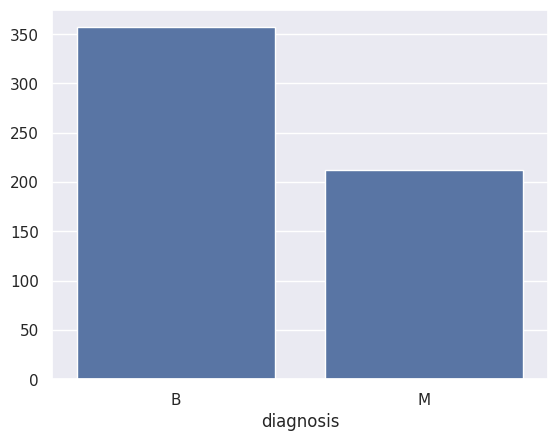

In [ ]:
sns.barplot(x = diagnosis.index, y = diagnosis.values);

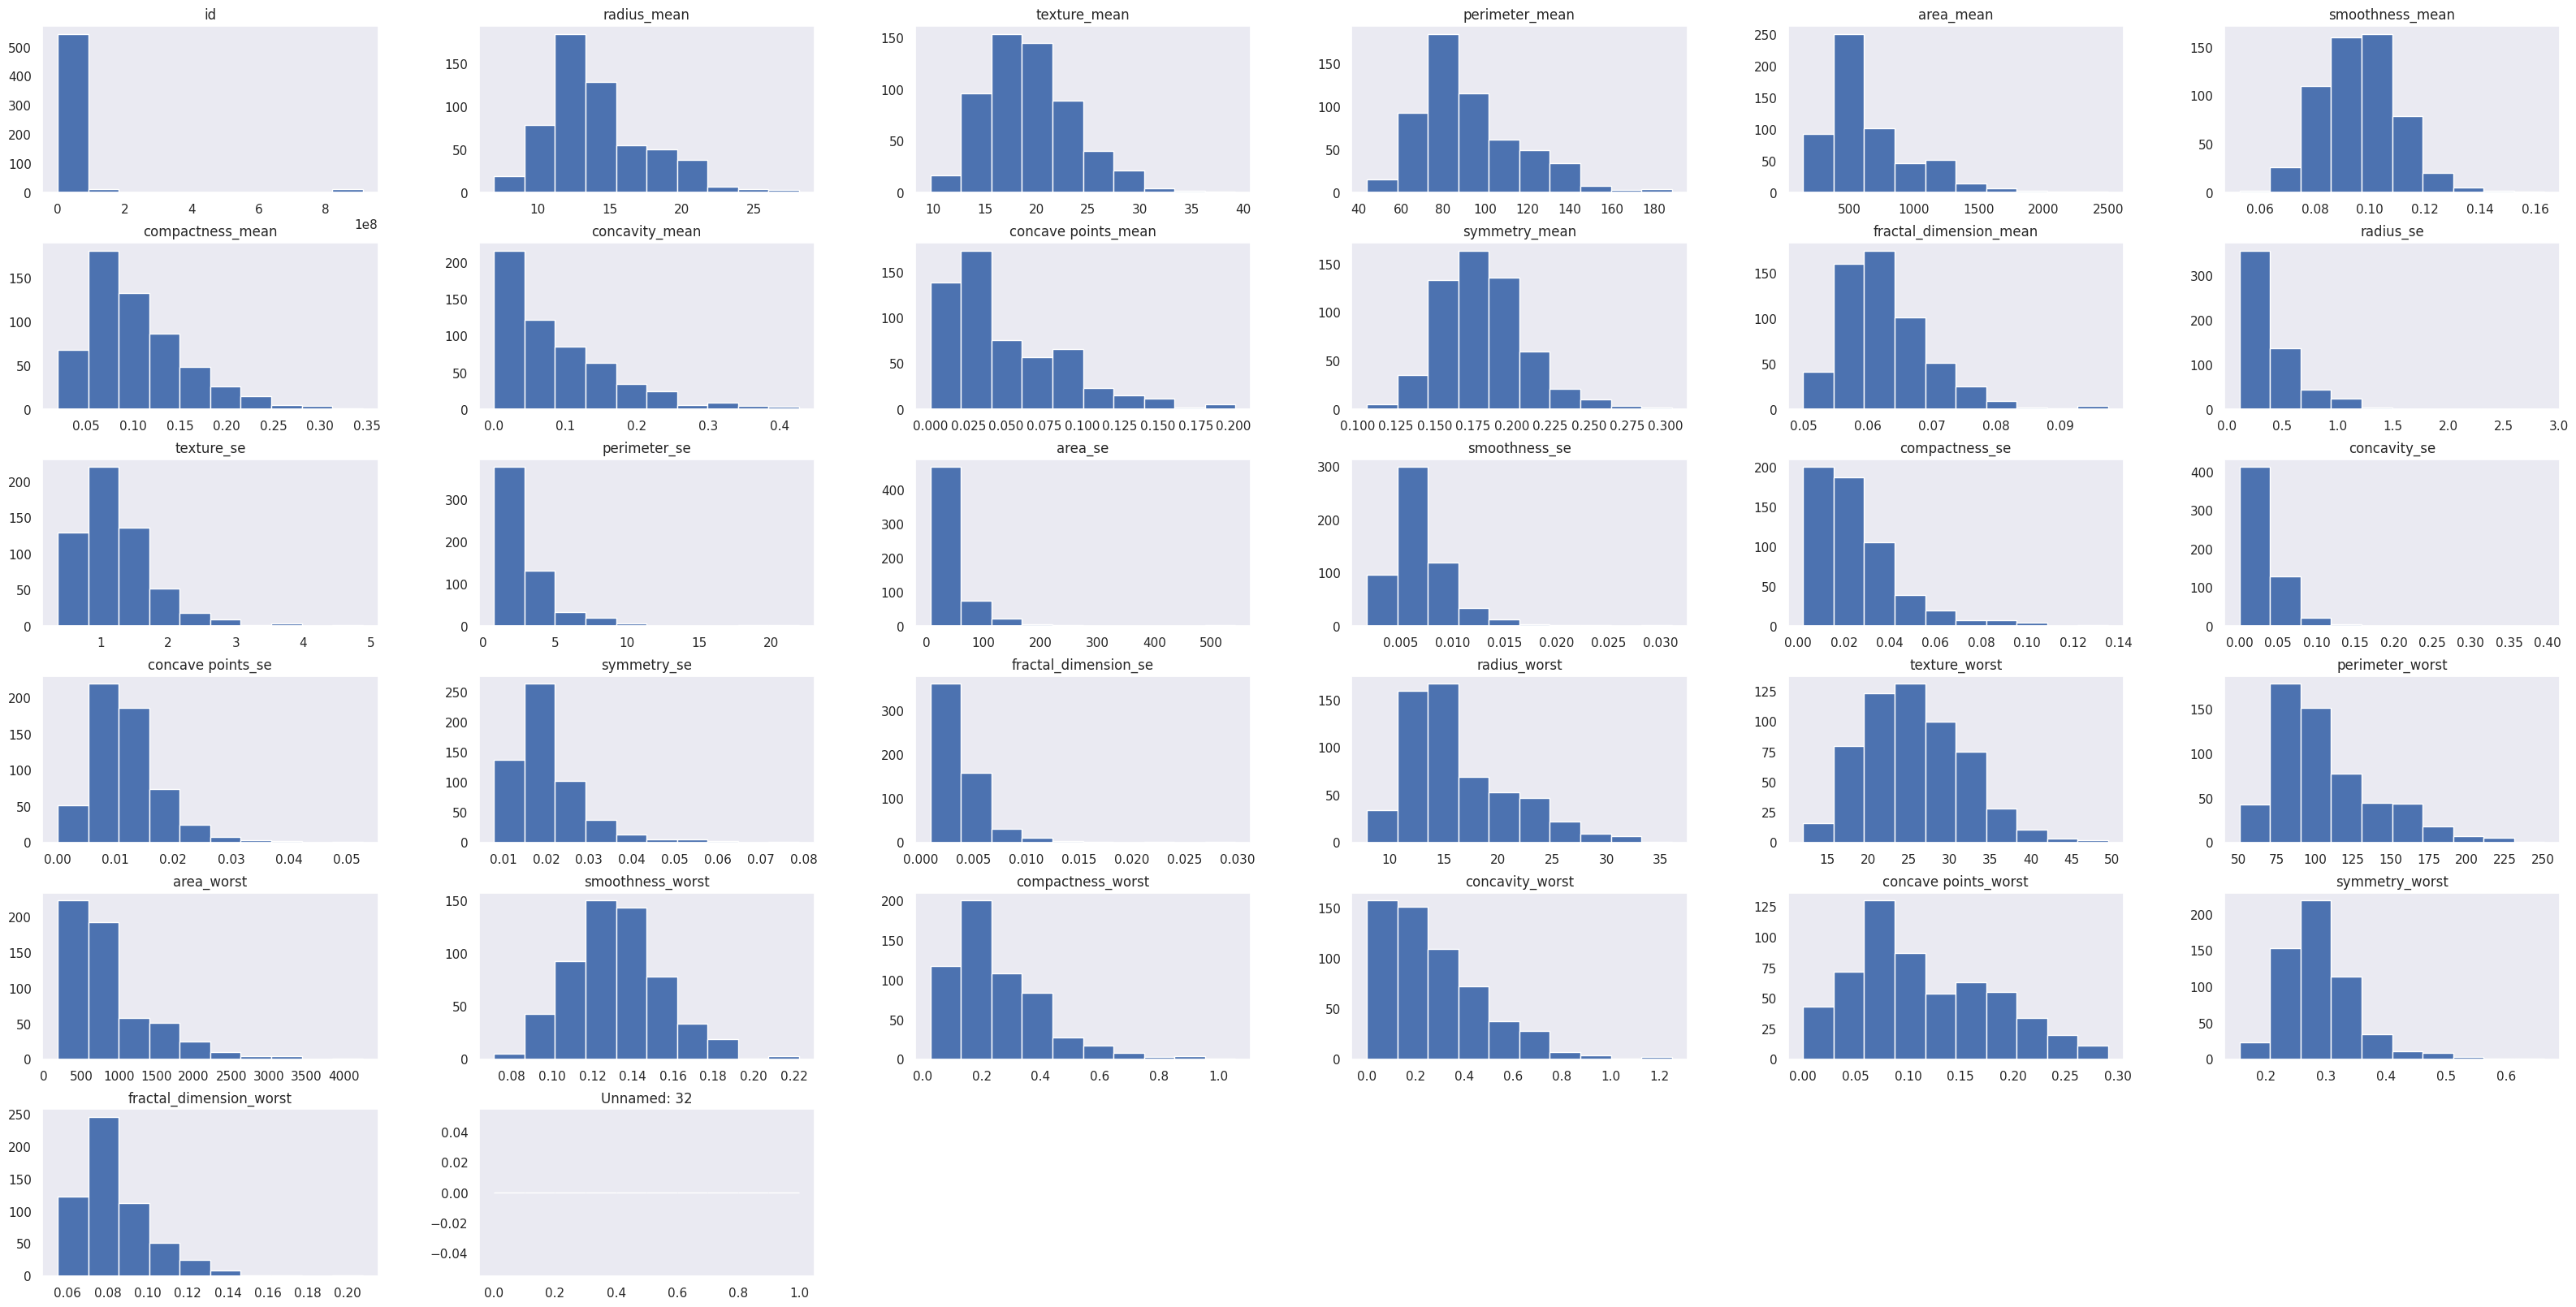

In [ ]:
#Getting insights of data distribution based on frequency of unique values in the features
data.hist(bins = 10, figsize = (40, 20), grid = False);

### Mapping string to numeric data

In [ ]:
cont = {'diagnosis' : {
    'M' : 1,
    'B' : 0}
}

In [ ]:
data = data.replace(cont)
data.diagnosis.value_counts()

/tmp/ipython-input-13-2371775644.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(cont)


,count
diagnosis,
0,357
1,212


### Checking for duplicate values

In [ ]:
data.duplicated().any()

np.False_

### Data Cleaning

In [ ]:
data.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Questions asked on the dataset with answers

### What is the Average Area of a Tumour of Person Who is Having Cancer?


In [ ]:
df=data[data['diagnosis']==1]

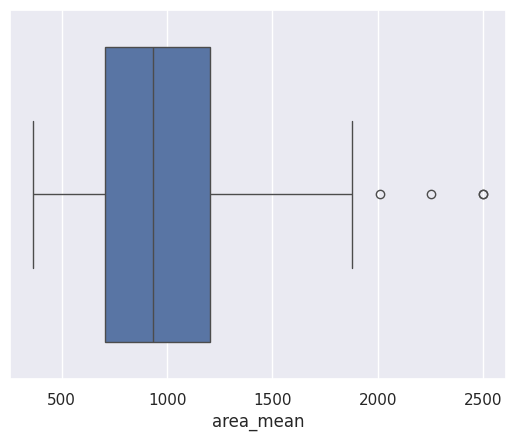

In [ ]:
sns.boxplot(x = df.area_mean);

In [ ]:
df[df['area_mean']<2000]['area_mean'].mean()

np.float64(952.6721153846154)

Answer : 952.67211 square units

### How does the area of tumour impact diagnosis ?

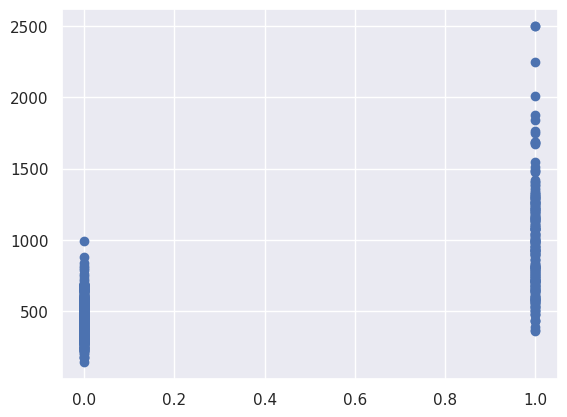

In [ ]:
plt.scatter(x='diagnosis',y='area_mean',data=data)

Answer : The above graph concludes that the person having large area of tumour is in risk and have to be tested immediately

### How does the radius impacts Diagnosis result?

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


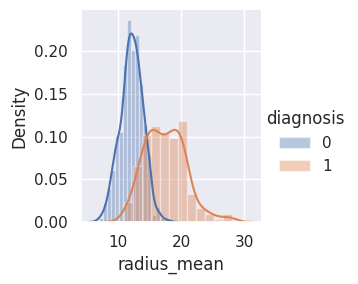

In [ ]:
sns.FacetGrid(data, hue="diagnosis") \
   .map(sns.distplot, "radius_mean") \
   .add_legend();
plt.show();

Answer : The person having large radius of tumour is at higher risk

## Feature Selection

In [ ]:
X = data[['concave points_mean','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [ ]:
Y = data[['diagnosis']]

### Feature Importance

<ipython-input-22-408356faaa79>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.04931338 0.05715962 0.02311897 0.04522313 0.06617137 0.00754855
 0.01909622 0.03679875 0.08478598 0.00877427 0.0051964  0.02341699
 0.00511419 0.01331016 0.02984042 0.00494626 0.00800193 0.00736957
 0.00800842 0.00534069 0.00700422 0.07628593 0.02024108 0.08389972
 0.10628209 0.02110503 0.03535647 0.04708665 0.07179668 0.01352263
 0.00888424]


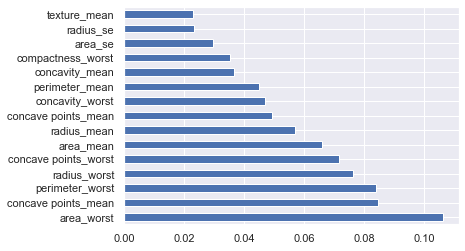

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh');
plt.show();

### Correlation heatmap

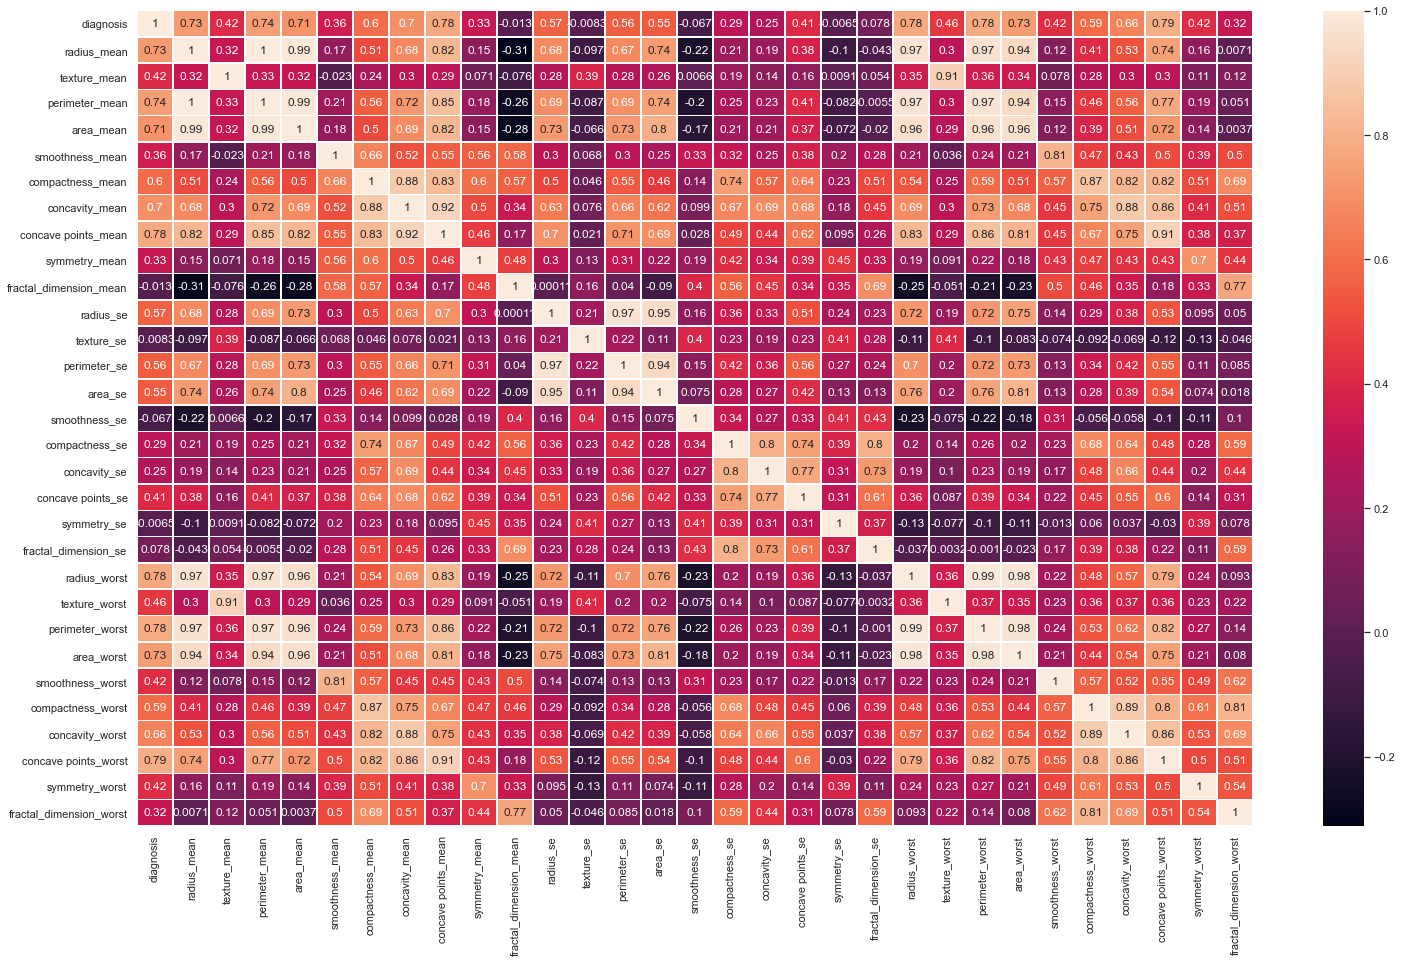

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5)

In [ ]:
#The features with high correlation than other features
high_corr_pts = []
for col in X:
  if(data[col].corr(data.diagnosis) > 0.5):
    high_corr_pts.append(col)
len(high_corr_pts)

16

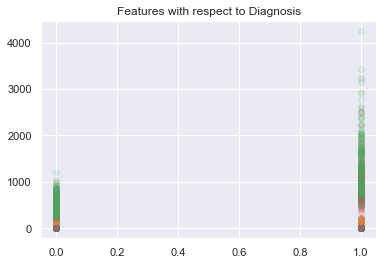

In [ ]:
for col in high_corr_pts:
  plt.scatter(data.diagnosis, data[col], alpha = 0.1)
  plt.title('Features with respect to Diagnosis')

In [ ]:
X= data[['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']]
y=data["diagnosis"].values


In [ ]:
X.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


## Normalising data

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 15) (455,)
Test set: (114, 15) (114,)


## Ensemble Machine Learning Modelling

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

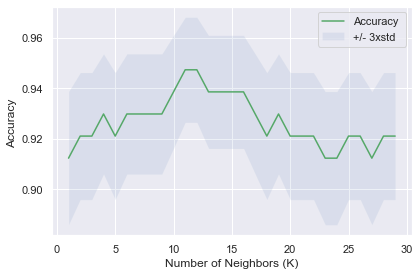

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9473684210526315 with k= 11


In [ ]:
from sklearn import metrics
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9122807 , 0.92105263, 0.92105263, 0.92982456, 0.92105263,
       0.92982456, 0.92982456, 0.92982456, 0.92982456, 0.93859649,
       0.94736842, 0.94736842, 0.93859649, 0.93859649, 0.93859649,
       0.93859649, 0.92982456, 0.92105263, 0.92982456, 0.92105263,
       0.92105263, 0.92105263, 0.9122807 , 0.9122807 , 0.92105263,
       0.92105263, 0.9122807 , 0.92105263, 0.92105263])

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 1000, random_state = 1)
rf.fit(X_train, y_train)
yhat2 = rf.predict(X_test)

### Support Vector Classifier

In [ ]:
#support vector classifier
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
yhat3=svm.predict(X_test)

## Accuracy calculation

In [ ]:
print('The Accuracy of KNN Model is',metrics.accuracy_score(y_test,yhat)*100)

The Accuracy of RandomForest Model is 92.10526315789474


In [ ]:
print('The Accuracy of RandomForest Model is',metrics.accuracy_score(y_test,yhat2)*100)

The Accuracy of RandomForest Model is 90.35087719298247


In [ ]:
print('The Accuracy of SVM Model is',metrics.accuracy_score(y_test,yhat3)*100)

The Accuracy of SVM Model is 91.22807017543859
